In [3]:
pip install pandas-datareader

In [3]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.6 MB 656.4 kB/s eta 0:00:12
     ---------------------------------------- 0.1/7.6 MB 656.4 kB/s eta 0:00:12
      --------------------------------------- 0.1/7.6 MB 590.8 kB/s eta 0:00:13
      --------------------------------------- 0.1/7.6 MB 590.8 kB/s eta 0:00:13
      --------------------------------------- 0.2/7.6 MB 538.9 kB/s eta 0:00:14
      --------------------------------------- 0.2/7.6 MB 538.9 kB/s eta 0:00:14
     - -------------------------------------- 0.2/7.6 MB 565.6 kB/s eta 0:00:14
     - -------------------------------------- 0.2/7.6 MB 529.7 kB/s eta 0:00:14
     - -------------------------------------- 0.2/7.6 MB 529.7 kB/s eta 0:00:14
     - -------------------------------------- 0.3/7.6 MB 527.8 kB/s eta 0:00:14
     - -------------------------------------- 0.3/7.6 MB 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data

In [4]:
!pip install yfinance

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['TATAPOWER.NS']
from datetime import datetime
startdate = datetime(2013,1,1)
enddate = datetime(2022,12,31)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,107.309906,107.985420,106.682648,107.502914,86.058037,2104064
2013-01-02,108.081924,108.419678,107.551163,108.081924,86.521561,1949486
2013-01-03,108.564430,108.612679,105.910629,106.296638,85.092400,1665263
2013-01-04,106.151886,106.875648,104.704361,106.344894,85.131027,1408714
2013-01-07,106.634399,106.634399,104.704361,104.993866,84.049500,1614341
...,...,...,...,...,...,...
2022-12-26,197.300003,204.649994,194.600006,203.149994,203.149994,18203352
2022-12-27,206.800003,208.300003,204.800003,207.699997,207.699997,11851262
2022-12-28,207.350006,210.300003,206.800003,208.250000,208.250000,8920331


In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,107.309906,107.985420,106.682648,107.502914,86.058037,2104064
1,2013-01-02,108.081924,108.419678,107.551163,108.081924,86.521561,1949486
2,2013-01-03,108.564430,108.612679,105.910629,106.296638,85.092400,1665263
3,2013-01-04,106.151886,106.875648,104.704361,106.344894,85.131027,1408714
4,2013-01-07,106.634399,106.634399,104.704361,104.993866,84.049500,1614341


In [8]:
df=df.drop('Date',axis=1)

In [9]:
df=df.drop('Adj Close',axis=1)

In [10]:
df.head()

,Open,High,Low,Close,Volume
0,107.309906,107.985420,106.682648,107.502914,2104064
1,108.081924,108.419678,107.551163,108.081924,1949486
2,108.564430,108.612679,105.910629,106.296638,1665263
3,106.151886,106.875648,104.704361,106.344894,1408714
4,106.634399,106.634399,104.704361,104.993866,1614341


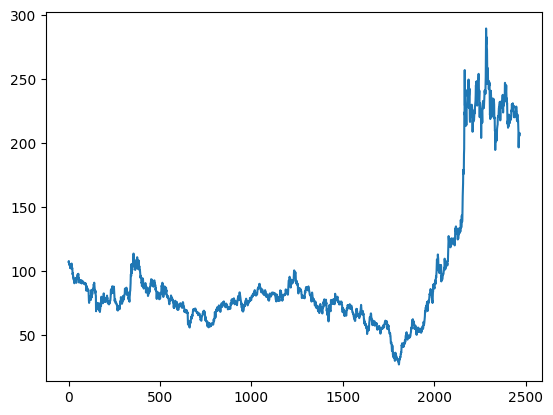

In [11]:
plt.plot(df.Close)

In [12]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2463    226.0965
2464    225.8700
2465    225.6260
2466    225.3595
2467    225.1600
Name: Close, Length: 2468, dtype: float64

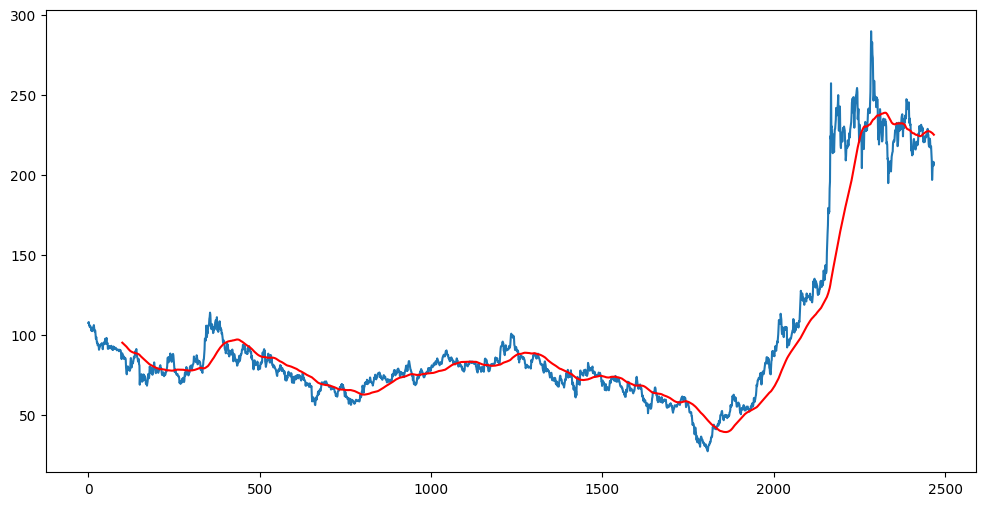

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2463    229.14150
2464    229.04525
2465    228.94025
2466    228.80825
2467    228.68100
Name: Close, Length: 2468, dtype: float64

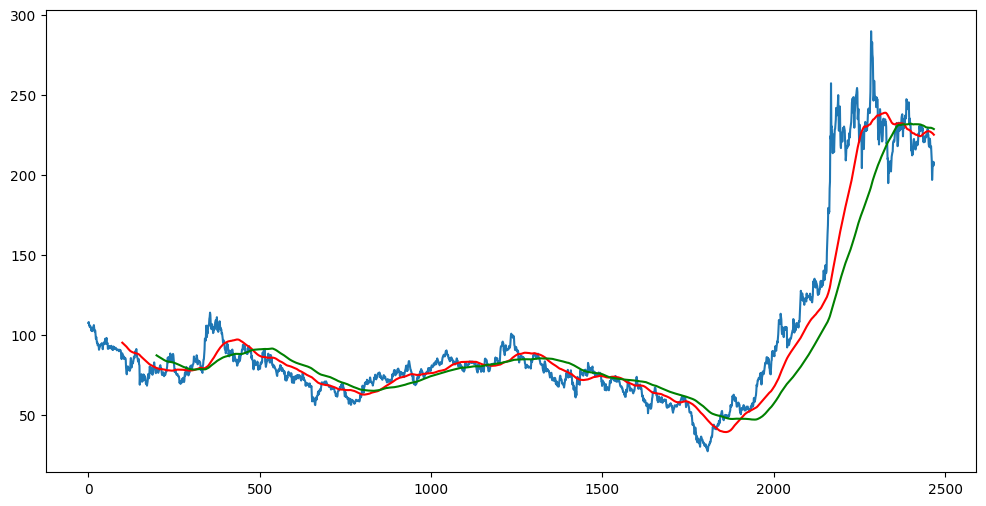

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
df.shape

(2468, 5)

In [17]:
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

data_train.shape

(1727, 1)

In [18]:
data_test.shape

(741, 1)

In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

data_train_array=scaler.fit_transform(data_train)
data_train_array.shape

(1727, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)
    

In [22]:
x_train.shape

(1627, 100, 1)

In [25]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [26]:
pip install tensorflow

     ---------------------------------------- 0.0/266.3 MB ? eta -:--:--
     ---------------------------------------- 0.4/266.3 MB 7.6 MB/s eta 0:00:36
     ---------------------------------------- 0.9/266.3 MB 9.1 MB/s eta 0:00:30
     --------------------------------------- 1.3/266.3 MB 10.1 MB/s eta 0:00:27
     --------------------------------------- 1.8/266.3 MB 10.3 MB/s eta 0:00:26
     --------------------------------------- 2.3/266.3 MB 10.5 MB/s eta 0:00:26
     --------------------------------------- 2.8/266.3 MB 10.4 MB/s eta 0:00:26
     --------------------------------------- 3.2/266.3 MB 10.3 MB/s eta 0:00:26
      -------------------------------------- 3.6/266.3 MB 10.1 MB/s eta 0:00:27
      -------------------------------------- 4.1/266.3 MB 10.2 MB/s eta 0:00:26
      -------------------------------------- 4.7/266.3 MB 10.3 MB/s eta 0:00:26
      -------------------------------------- 5.2/266.3 MB 10.4 MB/s eta 0:00:26
      -------------------------------------- 5.

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()

In [82]:
model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,epochs=200)

Epoch 1/200
51/51 [==============================] - 18s 227ms/step - loss: 0.0414
Epoch 2/200
51/51 [==============================] - 16s 319ms/step - loss: 0.0115
Epoch 3/200
51/51 [==============================] - 15s 288ms/step - loss: 0.0114
Epoch 4/200
51/51 [==============================] - 13s 259ms/step - loss: 0.0094
Epoch 5/200
51/51 [==============================] - 14s 269ms/step - loss: 0.0089
Epoch 6/200
51/51 [==============================] - 13s 261ms/step - loss: 0.0080
Epoch 7/200
51/51 [==============================] - 13s 259ms/step - loss: 0.0073
Epoch 8/200
51/51 [==============================] - 13s 251ms/step - loss: 0.0071
Epoch 9/200
51/51 [==============================] - 13s 257ms/step - loss: 0.0072
Epoch 10/200
51/51 [==============================] - 13s 255ms/step - loss: 0.0074
Epoch 11/200
51/51 [==============================] - 13s 256ms/step - loss: 0.0069
Epoch 12/200
51/51 [==============================] - 13s 261ms/step - loss: 0.0071
E

51/51 [==============================] - 13s 258ms/step - loss: 0.0018
Epoch 195/200
51/51 [==============================] - 13s 254ms/step - loss: 0.0017
Epoch 196/200
51/51 [==============================] - 13s 253ms/step - loss: 0.0017
Epoch 197/200
51/51 [==============================] - 13s 259ms/step - loss: 0.0019
Epoch 198/200
51/51 [==============================] - 14s 268ms/step - loss: 0.0019
Epoch 199/200
51/51 [==============================] - 13s 259ms/step - loss: 0.0019
Epoch 200/200
51/51 [==============================] - 13s 256ms/step - loss: 0.0018


In [84]:
model.save('keras_model.h5')

In [4]:
joblib.dump(model,'lstm_model.sav')

NameError: name 'joblib' is not defined

In [85]:
past_100_days=data_train.tail(100)
final_df=past_100_days.append(data_test,ignore_index=True)

In [86]:
final_df.head()

,Close
0,57.500000
1,55.750000
2,55.500000
3,56.099998
4,57.250000


In [88]:
test_data=scaler.fit_transform(final_df)
test_data.shape

(841, 1)

In [96]:
x_test=[]
y_test=[]

for i in range(100,test_data.shape[0]):
    x_test.append(test_data[i-100:i])
    y_test.append(test_data[i,0])
    
x_test,y_test=np.array(x_test),np.array(y_test)

In [97]:
x_test.shape

(741, 100, 1)

In [98]:
y_pred=model.predict(x_test)

24/24 [==============================] - 2s 79ms/step


In [99]:
y_pred.shape

(741, 1)

In [100]:
scaler.scale_

array([0.00380952])

In [101]:
scale_factor=1/0.00380952
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor


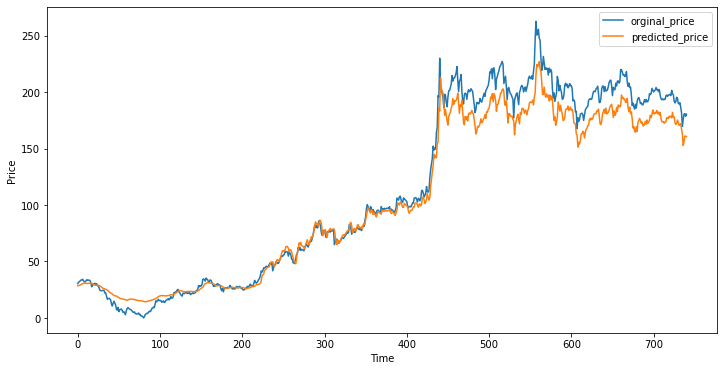

In [103]:
plt.figure(figsize=(12,6))
plt.plot(y_test,label='orginal_price')
plt.plot(y_pred,label='predicted_price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()